In [0]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import scikitplot as skplt

%matplotlib inline

In [21]:
from google.colab import files

uploaded = files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [0]:
def Data_Process():
    
    columns_to_named = ["Pregnancies","Glucose","BloodPressure",
           "SkinThickness","Insulin","BMI","DiabetesPedigreeFunction",
           "Age","Class"]
    
    df = pd.read_csv("pima-indians-diabetes.csv",header=0,names=columns_to_named)
    col_norm =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']
       
    df1_norm = df[col_norm].apply(lambda x :( (x - x.min()) / (x.max()-x.min()) ) )
        
    X_Data = df1_norm
    Y_Data = df["Class"]
    
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data,Y_Data, test_size=0.3,random_state=101)
    
    return X_Train, X_Test, Y_Train, Y_Test

In [0]:
def create_feature_column():
    
    feat_Pregnancies = tf.feature_column.numeric_column('Pregnancies')
    feat_Glucose = tf.feature_column.numeric_column('Glucose')
    feat_BloodPressure = tf.feature_column.numeric_column('BloodPressure')
    feat_SkinThickness_tricep = tf.feature_column.numeric_column('SkinThickness')
    feat_Insulin = tf.feature_column.numeric_column('Insulin')
    feat_BMI = tf.feature_column.numeric_column('BMI')
    feat_DiabetesPedigreeFunction  = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
    
    feature_column = [feat_Pregnancies, feat_Glucose, feat_BloodPressure, 
                  feat_SkinThickness_tricep, feat_Insulin, 
                 feat_BMI , feat_DiabetesPedigreeFunction] 
    
    return feature_column

In [0]:

X_Train, X_Test, Y_Train, Y_Test = Data_Process()
feature_column = create_feature_column()

input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(X_Train, 
                                                 Y_Train,
                                                 batch_size=50,
                                                 num_epochs=1000,
                                                 shuffle=True)

eval_func = tf.compat.v1.estimator.inputs.pandas_input_fn(X_Test,
                                               Y_Test,
                                               batch_size=50,
                                               num_epochs=1,
                                               shuffle=False)
predict_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
      x=X_Test,
      num_epochs=1,
      shuffle=False)

In [59]:
dnnmodel = tf.estimator.DNNClassifier(
                                        hidden_units = [20,20],
                                        feature_columns = feature_column,
                                        n_classes=2,
                                        activation_fn=tf.nn.softmax,
                                        dropout=None,
                                        optimizer = tf.optimizers.Adam(learning_rate=0.01)
                                    )



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpwaeh0xuu', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [60]:
history = dnnmodel.train(input_fn=input_func, 
               steps=500)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSave

In [61]:
dnnmodel.evaluate(eval_func)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-22T03:00:58Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpwaeh0xuu/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.51606s
INFO:tensorflow:Finished evaluation at 2020-04-22-03:00:58
INFO:tensorflow:Saving dict for global step 500: accuracy = 0.74891776, accuracy

{'accuracy': 0.74891776,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8047325,
 'auc_precision_recall': 0.68954104,
 'average_loss': 0.50902134,
 'global_step': 500,
 'label/mean': 0.35064936,
 'loss': 0.5109417,
 'precision': 0.6619718,
 'prediction/mean': 0.35668468,
 'recall': 0.5802469}

In [62]:
predictions = list(dnnmodel.predict(input_fn=predict_input_fn))
prediction = [p["class_ids"][0] for p in predictions]
data = classification_report(Y_Test,prediction)
conmat = confusion_matrix(Y_Test,prediction)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpwaeh0xuu/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


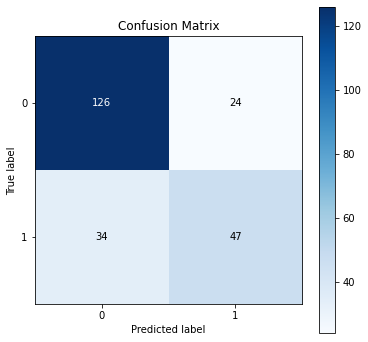

In [63]:

skplt.metrics.plot_confusion_matrix(Y_Test, 
                                    prediction,
                                   figsize=(6,6),
                                   title="Confusion Matrix")